In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os #os 접근
import glob #folder 안의 파일 다룰수있음

In [2]:
#path setting

train_path = 'TrainSet/'
train_dir = os.listdir(train_path)
test_path = 'TestSet/'
test_dir = os.listdir(test_path)

Training image:


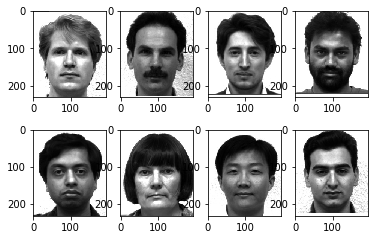

In [3]:
#Load Image Data
#Load Train Data
print("Training image:")
train_data = []
num_train = 0 #number of training data
height = 0
width = 0

for filename in glob.glob('TrainSet/*.jpg'):
    img = plt.imread(filename)
    if num_train == 0:
        height = img.shape[0]
        width = img.shape[1]
    img_data = np.array(img,dtype='float64')
    img_data = img_data.flatten() #from 2D to 1D
    train_data.append(img_data)
    #plotting for debug
    plt.subplot(2,4,1+num_train)
    plt.imshow(img,cmap='gray')
    num_train = num_train + 1
    
plt.show()
train_data = np.array(train_data)

Test image:


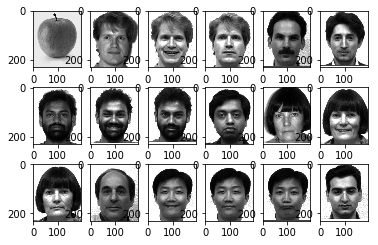

In [4]:
#Load Test image
print("Test image:")
test_data = []
num_test = 0
for filename in glob.glob('TestSet/*.jpg'):
    img = plt.imread(filename)
    img_data = np.array(img,dtype='float64')
    img_data = img_data.flatten() #from 2D to 1D
    test_data.append(img_data)
    #plotting data
    plt.subplot(3,6,1+num_test)
    plt.imshow(img,cmap = 'gray')
    num_test = num_test + 1
    
plt.show()
test_data = np.array(test_data)

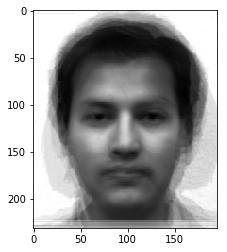

In [5]:
#Compute the mean value of training_data
X = train_data
mu = np.zeros((1,height*width))
for i in range(num_train):
    mu = mu + X[i]  #M = sigma i = 1 to 8 Xi
mu = mu/num_train #M = M/8
mu - mu.flatten()

#plot for debug
plt.imshow(mu.reshape(height,width),cmap = 'gray' )
plt.show()

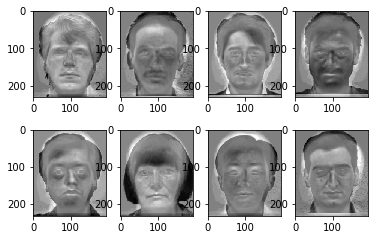

In [18]:
#compute X bar
''''
Xbar = []
for i in range(num_train):
    X_minus_mu = X[i] - mu
    Xbar.append(X_minus_mu)
Xbar = np.array(Xbar)
#plot for debug

for i in range(num_train):
    img= Xbar[i].reshape(height,width)
    
    plt.subplot(2,4,1+i)
    plt.imshow(img,cmap = 'gray')
'''
    
    #Compute Xbar
Xbar = []
for i in range(num_train):
    X_minus_mu=X[i]-mu
    Xbar.append(X_minus_mu)
Xbar = np.array(Xbar)
#plot for debug
for i in range(num_train):
    img = Xbar[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img,cmap='gray')
    

In [19]:
#PCA
'''
XbarXbarT = np.cov(Xbar)
XbarXbarT = XbarXbarT/num_train
eigenvalues = np.linalg.eig(XbarXbarT)
eigenvectors = np.linalg.eig(XbarXbarT)
'''

XbarXbarT = np.cov(Xbar)
XbarXbarT = XbarXbarT/num_train
eigenvalues, eigenvectors = np.linalg.eig(XbarXbarT)
#Sort the eigenvalues in decreasing order
ind = np.argsort(-eigenvalues)
sorted_eigvalues = eigenvalues[ind]
sorted_eigvectors = eigenvectors[ind]

ValueError: m has more than 2 dimensions

In [11]:
#Sort the eigenvalues in decreasing order
'''
ind = np.argsort(-eigenvalues)
sorted_eigvalues = eigenvalues[ind]
sorted_eigvectors = eigenvectors[ind]
''''''

NameError: name 'eigenvalues' is not defined

In [12]:
zero_eigvalue_ind = np.where(abs(sorted_eigvalues)<1e-8)
num_Qbar = zero_eigvalue_ind[0][0]

#progect the traindata onto Qbar

Qbar = np.array(sorted_eigenvectors[:num_Qbar])
Qbar = Qbar.transpose()
QbarTX = np.dot(X.transpose(),Qbar)
QbarTX = QbarTX.traspose()



NameError: name 'sorted_eigvalues' is not defined

In [13]:
for i in range(num_Qbar):
    img = QbarTX[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img,Cmap = 'jet')
    
plt.show()

NameError: name 'num_Qbar' is not defined